In [1]:
from MR_env_ddpg import MR_env as Environment
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import copy
from datetime import datetime
import scipy.linalg as linalg 
import random
import pdb
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.animation import FuncAnimation, PillowWriter
import DDPG_new as DDPG

In [14]:
r =np.load('reward.npy')

In [15]:
r = r[-1,:,:]
r = r.flatten()

In [20]:
r_1 = np.load('C:/Users/macri/Desktop/normale_debug/reward.npy')

In [25]:
r_1[-1,-1,:].shape

(512,)

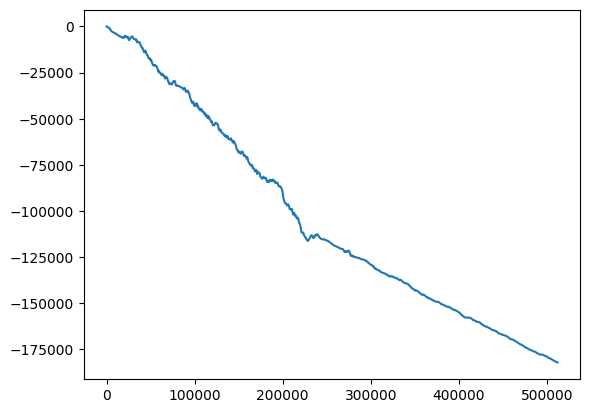

In [29]:
plt.plot(r_1[:,:,-1].cumsum())

In [61]:
I= np.load('I.npy')
I = I#[:, :490]

In [62]:
S= np.load('S.npy')
#S = S[:, 10:]

<Figure size 500x500 with 0 Axes>

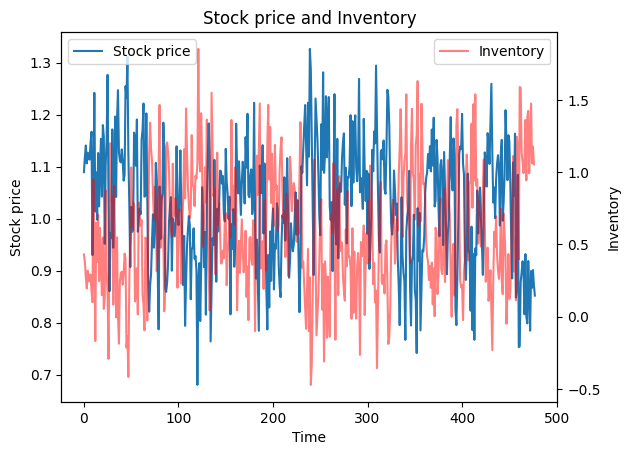

In [63]:
a = 0.2*np.arange(0, 12)/40
t = a[:-(10 + 2)]
plt.figure(figsize=(5,5))
fig, ax1 = plt.subplots()
ax1.plot((S[:,10:-12]).squeeze(0), label = 'Stock price')
ax1.set_ylabel('Stock price')
ax1.set_xlabel('Time')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot((I[:,10:-15]).squeeze(0), color='red', label = 'Inventory', alpha=0.5)
ax2.set_ylabel('Inventory')
ax2.legend(loc='upper right')
plt.title("Stock price and Inventory")
plt.show()

In [64]:
es = S[:,10:-12]
ai = I[:,10:-15]
ai[:,:].shape, (es[:,1:] - es[:,:-1]).shape

((1, 477), (1, 477))

In [79]:
q = ai[:,0:-1] - ai[:,1:] 
q.shape

(1, 476)

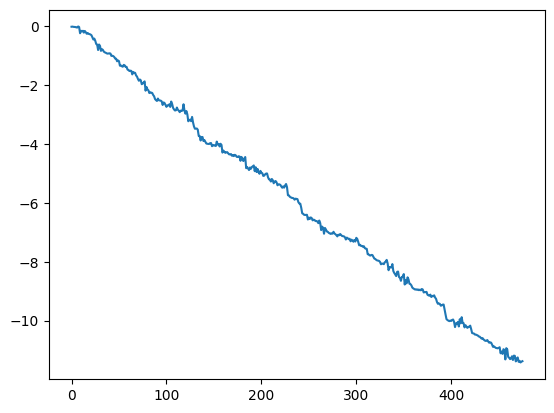

In [80]:
q = ai[:,0:-1] - ai[:,1:]
r = ai[:,1:]*(es[:,0:-1] - es[:,1:])[:,1:] - 0.05*np.abs(q)
plt.plot(r.squeeze(0).cumsum())

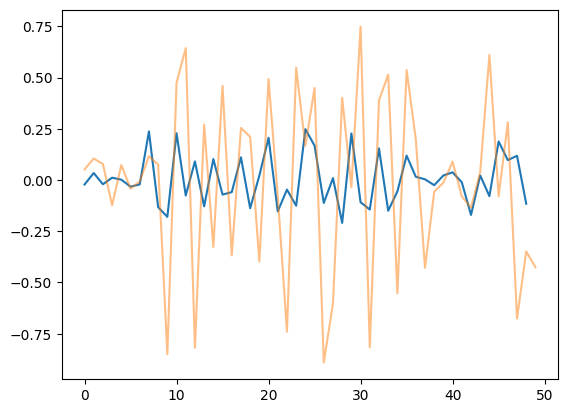

In [81]:
plt.plot((es[:,0:-1] - es[:,1:])[:,1:50].squeeze(0))
plt.plot((ai[:,0:-1] - ai[:,1:]).squeeze(0)[:50], alpha=0.5)

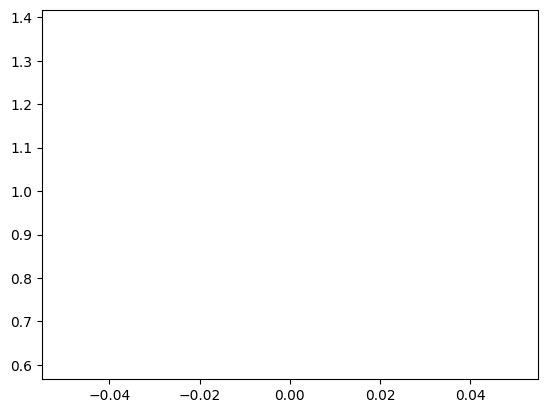

In [21]:
for i in range(477):
    plt.plot(es[:,i].squeeze(0))
    #plt.plot(ai[:,i])

In [13]:
S_gru = torch.ones(1, 10, 512)
S_gru

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [14]:
I_gru = torch.zeros(1, 10, 512)
I = I_gru[:,:1,:]
I.shape

torch.Size([1, 1, 512])

In [15]:
II = torch.randn(1, 1, 512)
II.shape

torch.Size([1, 1, 512])

In [16]:
concatenated_tensor = torch.cat((I, S_gru), dim=1)
concatenated_tensor[:, 1:,:].shape

torch.Size([1, 10, 512])

In [17]:
import torch

import torch.nn as nn

class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(1, batch_size, self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Example usage
input_size = 512
hidden_size = 256
output_size = 1

model = GRUModel(input_size, hidden_size, output_size)
inputs = torch.randn(1, 10, input_size)  # Assuming batch size of 1
output = model(inputs)
print(output)

tensor([[0.2558]], grad_fn=<AddmmBackward0>)


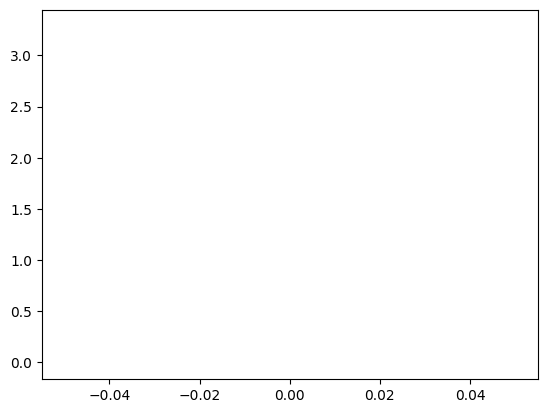

In [18]:
i = np.load('I.npy')
plt.plot(i);